<a href="https://colab.research.google.com/github/Shahid-TheMatrixMaker/100-Data-Science-Project/blob/main/Tabular_playground_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

# Load train and test data

train_df = pd.read_csv("train.csv")
train_df = train_df.reset_index().set_index('id').drop('index', axis=1)

test_df = pd.read_csv("test.csv")
test_df = test_df.reset_index().set_index('id').drop('index', axis=1)

# Explore train dataset
train_df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [2]:
# Explore train dataset
test_df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [3]:
train_df.value_counts()

product_code  loading  attribute_0  attribute_1  attribute_2  attribute_3  measurement_0  measurement_1  measurement_2  measurement_3  measurement_4  measurement_5  measurement_6  measurement_7  measurement_8  measurement_9  measurement_10  measurement_11  measurement_12  measurement_13  measurement_14  measurement_15  measurement_16  measurement_17  failure
A             40.81    material_7   material_8   9            5            6              4              11             18.495         12.163         15.303         17.795         11.490         17.853         12.419         17.983          20.860          10.537          16.248          15.771          16.715          18.419          508.769         0          1
D             103.37   material_7   material_5   6            6            6              7              2              17.459         10.940         15.707         17.924         10.200         18.126         12.598         19.139          18.689          10.560          17.254          16.813          15.277          16.354          516.546         0          1
              103.06   material_7   material_5   6            6            9              13             5              17.156         13.273         16.226         17.514         9.543          20.166         10.924         17.400          19.564          14.952          15.974          16.745          12.413          17.651          588.342         0          1
              103.11   material_7   material_5   6            6            6              9              5              18.782         11.444         17.768         19.365         11.843         18.322         10.934         17.330          19.879          10.244          13.754          17.155          14.629          17.706          905.670         0          1
                                                                           12             6              10             17.462         12.260         15.795         15.846         11.088         19.108         10.867         16.024          19.452          13.735          15.800          16.430          12.701          19.505          426.736         1          1
                                                                                                                                                                                                                                                                                                                                                                           ..
B             141.34   material_5   material_5   8            8            6              4              4              18.154         11.899         18.359         17.587         10.641         18.639         11.917         14.147          18.139          14.866          14.016          15.864          13.816          16.361          676.579         1          1
              141.36   material_5   material_5   8            8            2              15             7              19.012         12.192         17.431         17.717         12.019         17.866         11.173         17.382          16.762          13.537          17.547          15.762          14.108          15.333          774.531         1          1
              141.46   material_5   material_5   8            8            1              4              7              18.437         12.058         17.172         16.913         11.422         18.995         13.403         17.397          17.739          13.020          16.259          16.005          15.104          17.309          756.539         0          1
              141.53   material_5   material_5   8            8            5              6              9              18.897         10.225         17.302         17.639         12.861         19.725         12.915         17.794          16.087          11.294          16.280          16.413          13.898          16.372          800.530 

In [4]:
test_df.value_counts()

product_code  loading  attribute_0  attribute_1  attribute_2  attribute_3  measurement_0  measurement_1  measurement_2  measurement_3  measurement_4  measurement_5  measurement_6  measurement_7  measurement_8  measurement_9  measurement_10  measurement_11  measurement_12  measurement_13  measurement_14  measurement_15  measurement_16  measurement_17
F             42.77    material_5   material_6   6            4            18             9              1              16.860         10.126         14.598         16.677         12.659         19.364         11.925         17.817          17.922          12.419          15.969          17.844          13.074          14.133          418.049           1
H             140.78   material_7   material_7   7            9            10             8              6              19.478         11.267         18.143         18.095         11.831         19.236         10.780         14.367          19.807          13.743          15.873          16.751          17.014          15.967          706.057           1
              140.92   material_7   material_7   7            9            3              5              2              17.716         13.135         14.214         18.305         10.487         18.042         11.692         12.306          20.654          11.230          14.244          16.983          16.281          16.025          546.624           1
              140.96   material_7   material_7   7            9            4              7              8              18.252         12.308         16.983         17.959         10.547         18.381         12.978         16.734          18.096          13.576          15.296          13.364          13.686          15.580          755.995           1
              140.98   material_7   material_7   7            9            10             4              2              18.848         11.297         17.484         17.219         12.942         18.834         10.481         15.175          16.699          13.898          16.933          15.780          14.615          17.867          675.179           1
                                                                                                                                                                                                                                                                                                                                                                  ..
G             104.51   material_5   material_6   9            7            12             9              0              19.205         10.738         17.097         18.678         11.687         19.138         10.564         17.022          18.454          12.505          15.842          17.211          14.433          17.768          694.000           1
              104.58   material_5   material_6   9            7            9              9              8              17.946         9.991          16.523         18.427         11.632         18.979         12.760         15.912          19.176          11.318          17.066          16.233          16.888          16.196          714.892           1
                                                                           14             4              6              17.404         11.308         17.628         17.641         9.878          18.405         12.289         16.210          16.884          12.594          15.169          16.219          15.442          17.267          696.164           1
              104.62   material_5   material_6   9            7            3              11             6              16.833         12.470         15.705         19.393         9.898          18.122         10.525         14.045          21.805          11.352          16.533          15.327          15.863          16.143          764.276           1
I             308.89   material_7   material_5   9            5            2  

In [5]:
train_df = train_df.drop(['product_code', 'attribute_3', 'attribute_2', 'attribute_1', 'attribute_0', 'measurement_1',
                          'measurement_11', 'measurement_12', 'measurement_13', 'measurement_16'], axis=1)

test_df = test_df.drop(['product_code', 'attribute_3', 'attribute_2', 'attribute_1', 'attribute_0', 'measurement_1',
                        'measurement_11', 'measurement_12', 'measurement_13', 'measurement_16'], axis=1)

In [6]:
cat_cols = list(train_df.select_dtypes(include=['object']).columns)
for c in cat_cols:
    print(f'{c} Train: {train_df[c].value_counts()}')
    print(f'{c} Test: {test_df[c].value_counts()}')

cat_cols = set(cat_cols) - set(('product_code',))
cat_cols = list(cat_cols)

float_cols = train_df.select_dtypes(include=['float64']).columns
int_cols = set(train_df.select_dtypes(include=['int64']).columns) - set(cat_cols)
int_cols = list(int_cols)

In [7]:
# Load train and test data
train_df = pd.read_csv("train.csv")
train_df = train_df.reset_index().set_index('id').drop('index', axis=1)

test_df = pd.read_csv("test.csv")
test_df = test_df.reset_index().set_index('id').drop('index', axis=1)

cat_cols = list(train_df.select_dtypes(include=['object']).columns)
for c in cat_cols:
    print(f'{c} Train: {train_df[c].value_counts()}')
    print(f'{c} Test: {test_df[c].value_counts()}')
float_cols = train_df.select_dtypes(include=['float64']).columns
int_cols = set(train_df.select_dtypes(include=['int64']).columns) - set(cat_cols)
int_cols = list(int_cols)

product_code Train: product_code
C    5765
E    5343
B    5250
D    5112
A    5100
Name: count, dtype: int64
product_code Test: product_code
F    5422
I    5228
G    5107
H    5018
Name: count, dtype: int64
attribute_0 Train: attribute_0
material_7    21320
material_5     5250
Name: count, dtype: int64
attribute_0 Test: attribute_0
material_5    10529
material_7    10246
Name: count, dtype: int64
attribute_1 Train: attribute_1
material_8    10865
material_5    10362
material_6     5343
Name: count, dtype: int64
attribute_1 Test: attribute_1
material_6    10529
material_5     5228
material_7     5018
Name: count, dtype: int64


In [8]:
# Importing necessary libraries
from sklearn.experimental import enable_iterative_imputer  # Enable experimental features
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer  # Now this should work
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Separate the features (X) and target variable (y) from train_df
X_train = train_df.drop('failure', axis=1)
y_train = train_df['failure']
X_test = test_df

# Creating a pipeline for numerical columns to handle missing values and scale data
float_transformer = Pipeline(
    steps=[
        ("imputer", IterativeImputer(initial_strategy='median')),
        ("scaler", StandardScaler())
    ]
)

# One hot encoding for categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating a preprocessor which applies the transformations to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", float_transformer, float_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder='passthrough'
)

# Fitting the preprocessor to the training data
preprocessor.fit(X_train)

# Transforming the training and test data
trans_X_train = preprocessor.transform(X_train)
trans_X_test = preprocessor.transform(X_test)

# Converting the transformed data into a DataFrame
trans_X_train_df = pd.DataFrame(trans_X_train, columns=preprocessor.get_feature_names_out(), index=X_train.index)
trans_X_test_df = pd.DataFrame(trans_X_test, columns=preprocessor.get_feature_names_out(), index=X_test.index)

<ipython-input-9-f8d3be9f31b5>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  trans_X_train_df.hist(ax=ax)


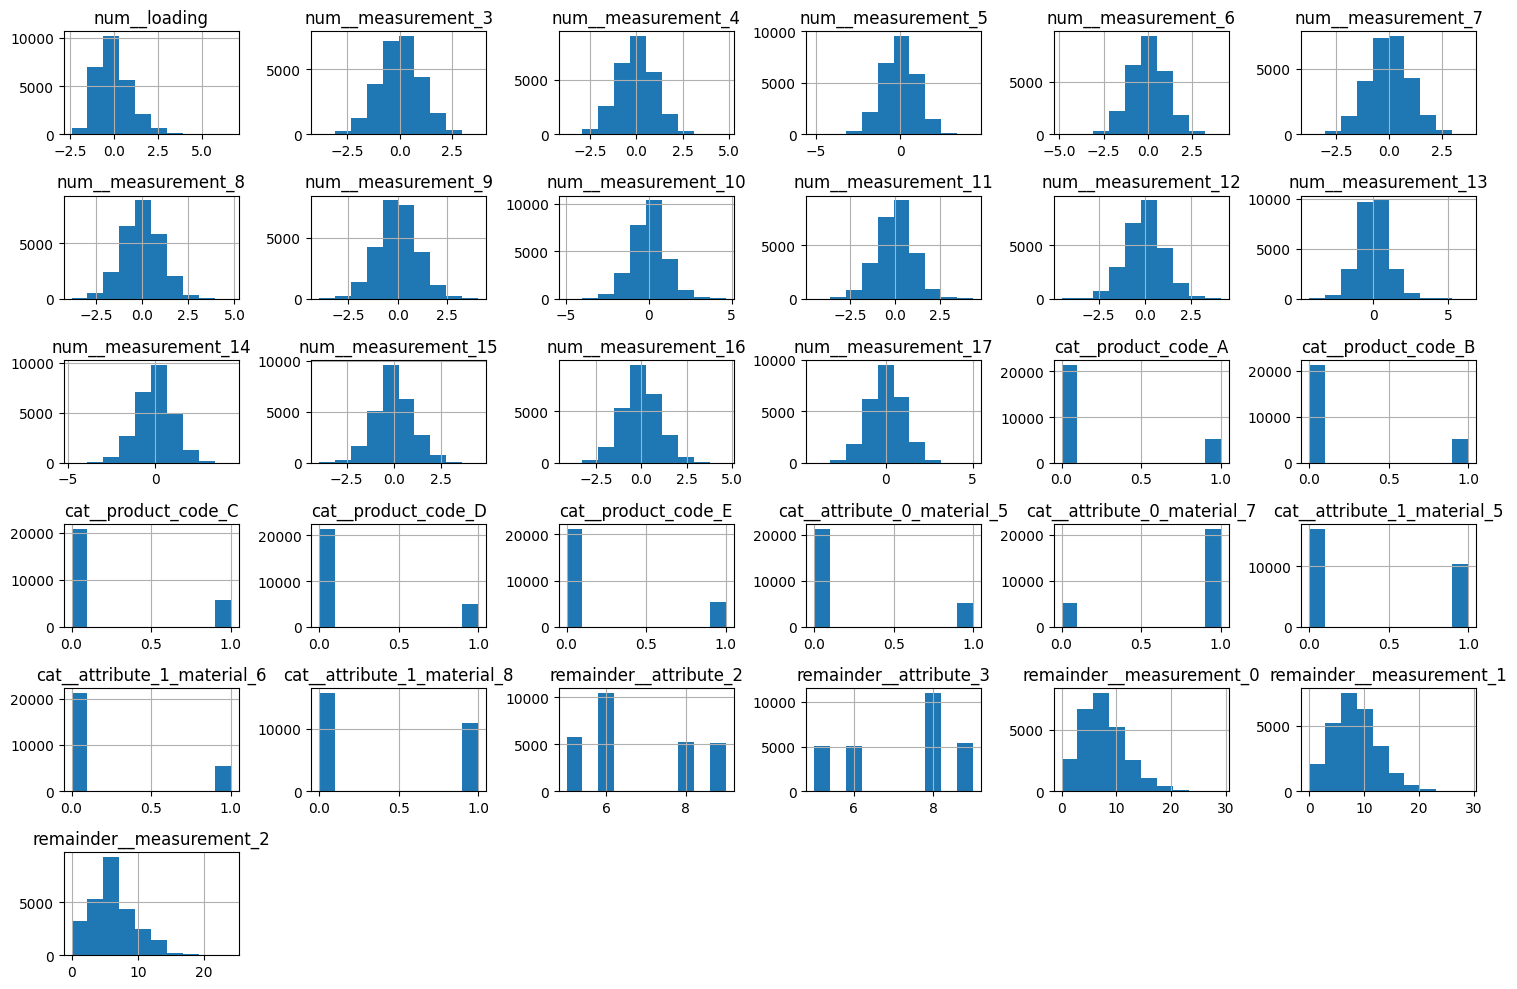

In [9]:
# Plotting histograms of the transformed training data
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
trans_X_train_df.hist(ax=ax)
fig.tight_layout()

<ipython-input-10-6f7f6b3dbbe4>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  trans_X_test_df.hist(ax=ax)


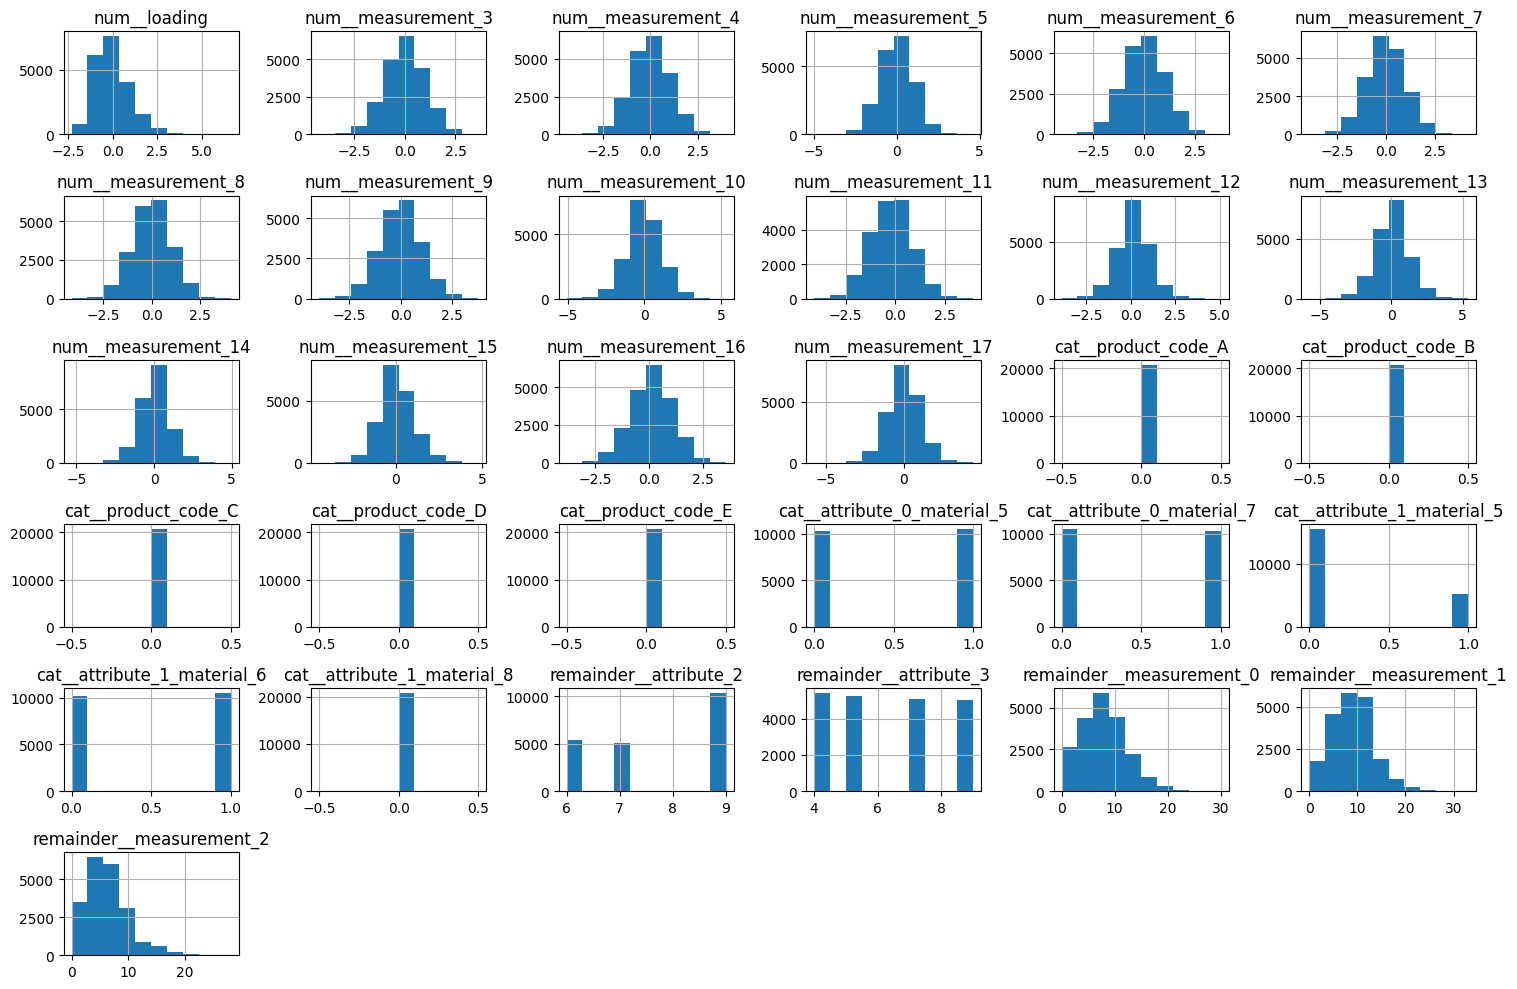

In [10]:
# Plotting histograms of the transformed test data
fig = plt.figure(figsize=(15, 10))
ax = fig.gca()
trans_X_test_df.hist(ax=ax)
fig.tight_layout()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(trans_X_train_df, train_df['failure'], test_size=0.15)
print(f'train {len(X_train)} test {len(X_val)}')
print(trans_X_test_df.dtypes)
print(Y_train.dtypes)
print(trans_X_test_df.head())

train 22584 test 3986
num__loading                   float64
num__measurement_3             float64
num__measurement_4             float64
num__measurement_5             float64
num__measurement_6             float64
num__measurement_7             float64
num__measurement_8             float64
num__measurement_9             float64
num__measurement_10            float64
num__measurement_11            float64
num__measurement_12            float64
num__measurement_13            float64
num__measurement_14            float64
num__measurement_15            float64
num__measurement_16            float64
num__measurement_17            float64
cat__product_code_A            float64
cat__product_code_B            float64
cat__product_code_C            float64
cat__product_code_D            float64
cat__product_code_E            float64
cat__attribute_0_material_5    float64
cat__attribute_0_material_7    float64
cat__attribute_1_material_5    float64
cat__attribute_1_material_6    float64
cat

In [12]:
# Import necessary libraries for the models you want to evaluate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the models you want to evaluate
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    LogisticRegression()
]

# Train and evaluate each model
for model in models:
    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, Y_train, cv=5)

    # Print the evaluation results
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

# Compare the performance of the models and select the best one based on the evaluation results and requirements

# Train the selected model on the entire training data
selected_model = RandomForestClassifier()
selected_model.fit(X_train, Y_train)

# Evaluate the selected model using the validation data
y_pred = selected_model.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred)
print(f"Selected Model Accuracy: {accuracy:.4f}")

Model: DecisionTreeClassifier
Accuracy: 0.6617 (±0.0032)
Model: RandomForestClassifier
Accuracy: 0.7878 (±0.0003)
Model: SVC
Accuracy: 0.7879 (±0.0001)
Model: LogisticRegression
Accuracy: 0.7879 (±0.0006)
Selected Model Accuracy: 0.7842


In [13]:
# Importing necessary libraries
from xgboost import DMatrix, cv

def modelfit(alg, X, Y, cv_folds=5, early_stopping_rounds=50):
    """
    This function fits a model using XGBoost's built-in cross-validation.

    Parameters:
    alg: The XGBoost model
    X_train: The training data
    Y_train: The target variable
    cv_folds: The number of cross-validation folds (default is 5)
    early_stopping_rounds: Activates early stopping (default is 50)
    """
    # Get the parameters of the XGBoost model
    xgb_param = alg.get_xgb_params()

    # Create a DMatrix from the training data and target variable
    xgtrain = DMatrix(X, label=Y)

    # Perform cross-validation
    cvresult = cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                  metrics='auc', early_stopping_rounds=early_stopping_rounds)

    # Set the number of estimators to the number of rounds that gave the best result
    alg.set_params(n_estimators=cvresult.shape[0])

    # Fitting the algorithm
    alg.fit(X, Y)

In [14]:
print(trans_X_train_df.shape)
print(Y_train.shape)

(26570, 31)
(22584,)


In [15]:
# Importing necessary libraries
from xgboost import XGBClassifier
# Defining the best model with optimal hyperparameters
best_model = XGBClassifier(n_estimators=100,  # Set a default value
                           max_depth=10,
                           eta=0.08576723343696911,
                           gamma=33.40638990503902,
                           min_child_weight=6.686242310457466,
                           objective='binary:logistic');

# Fitting the best model using the modelfit function
modelfit(best_model, trans_X_train_df[0:22584], Y_train, early_stopping_rounds=16)

In [16]:
# Predicting probabilities using the best model
pred = best_model.predict_proba(trans_X_test_df)

# Creating a DataFrame for the submission
submission = pd.DataFrame({'failure': pred[:,1]}, index=trans_X_test_df.index)

# Setting the index name to 'id'
submission.index.name = 'id'

In [18]:
# Save your submission DataFrame to a CSV file named ‘submission.csv’ in the current working directory:
submission.to_csv('submission.csv')